In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_path = "./data/Small-diameter-flow.csv"
data = pd.read_csv(data_path, index_col=0)

print(data.head())


        Flow  Kinematic  Geometric   Inertial  Observer
0 -17.047687  -0.584344  -6.896327 -14.323560       0.0
1 -17.043179  -0.584344  -6.896327 -14.323560       0.0
2 -17.043179  -0.584344  -6.896327 -14.323560       0.0
3 -11.182193   1.242506  -5.069476 -11.583284       0.0
4 -11.184430   1.242506  -5.069476 -11.583284       0.0


#### Flow:

Detta representerar vätskans flödeshastighet, kanske liter per sekund.
Lär vara vår beroende variabel (y).

#### Kinematic:

Kanske representerar kinematisk viskositet(vätskans motstånd mot flöde under påverkan av gravitation)?
Viktig faktor för att förstå vätskans egenskaper och påverkan på flödet.

#### Geometric:

Kan hänvisa till någon geometrisk egenskap hos röret, t.ex. diameter eller form.
Relevant för att modellera hur flödet påverkas av rördimensionerna.

#### Inertial:

Detta kan syfta på den tröghet som är förknippad med vätskans rörelse, beroende på dess densitet och hastighet. 


#### Observer:

Detta är enbart vilken individ det var som observerade värdena vid ett visst tillfälle.

In [2]:
data_sorted_by_flow = data.sort_values(by="Flow", ascending=False)
print("Sorted by Flow:")
print(data_sorted_by_flow.head())

Sorted by Flow:
          Flow  Kinematic  Geometric   Inertial  Observer
165 -11.095609   0.921740  -5.141828 -11.985050       0.0
6   -11.128810   1.242506  -5.069476 -11.583284       1.0
7   -11.144379   1.242506  -5.069476 -11.583284       1.0
162 -11.147396   0.974663  -5.141828 -11.985050       0.0
8   -11.155447   1.242506  -5.069476 -11.583284       1.0


In [3]:
data_sorted_by_kinematic = data.sort_values(by="Kinematic", ascending=False)
print("Sorted by Kinematic:")
print(data_sorted_by_kinematic.head())

Sorted by Kinematic:
        Flow  Kinematic  Geometric   Inertial  Observer
4 -11.184430   1.242506  -5.069476 -11.583284       0.0
3 -11.182193   1.242506  -5.069476 -11.583284       0.0
5 -11.201048   1.242506  -5.069476 -11.583284       0.0
8 -11.155447   1.242506  -5.069476 -11.583284       1.0
7 -11.144379   1.242506  -5.069476 -11.583284       1.0


In [4]:
data_sorted_by_geometric = data.sort_values(by="Geometric", ascending=False)
print("Sorted by Geometric:")
print(data_sorted_by_geometric.head())

Sorted by Geometric:
        Flow  Kinematic  Geometric   Inertial  Observer
4 -11.184430   1.242506  -5.069476 -11.583284       0.0
3 -11.182193   1.242506  -5.069476 -11.583284       0.0
5 -11.201048   1.242506  -5.069476 -11.583284       0.0
8 -11.155447   1.242506  -5.069476 -11.583284       1.0
7 -11.144379   1.242506  -5.069476 -11.583284       1.0


In [5]:
data_sorted_by_inertial = data.sort_values(by="Inertial", ascending=False)
print("Sorted by Inertial:")
print(data_sorted_by_inertial.head())

Sorted by Inertial:
        Flow  Kinematic  Geometric   Inertial  Observer
4 -11.184430   1.242506  -5.069476 -11.583284       0.0
3 -11.182193   1.242506  -5.069476 -11.583284       0.0
5 -11.201048   1.242506  -5.069476 -11.583284       0.0
8 -11.155447   1.242506  -5.069476 -11.583284       1.0
7 -11.144379   1.242506  -5.069476 -11.583284       1.0


In [6]:
data_sorted_by_observer = data.sort_values(by="Observer", ascending=False)
print("Sorted by Observer:")
print(data_sorted_by_observer.head())

Sorted by Observer:
         Flow  Kinematic  Geometric   Inertial  Observer
36 -11.316441   0.609766  -5.206650 -12.453012       1.0
37 -11.554490   0.609766  -5.206650 -12.453012       1.0
33 -11.338251   0.662688  -5.206650 -12.453012       1.0
8  -11.155447   1.242506  -5.069476 -11.583284       1.0
7  -11.144379   1.242506  -5.069476 -11.583284       1.0


In [7]:
print(data_sorted_by_flow.head(1))
print(data_sorted_by_kinematic.head(1))
print(data_sorted_by_geometric.head(1))
print(data_sorted_by_inertial.head(1))
print(data_sorted_by_observer.head(1))

          Flow  Kinematic  Geometric  Inertial  Observer
165 -11.095609    0.92174  -5.141828 -11.98505       0.0
       Flow  Kinematic  Geometric   Inertial  Observer
4 -11.18443   1.242506  -5.069476 -11.583284       0.0
       Flow  Kinematic  Geometric   Inertial  Observer
4 -11.18443   1.242506  -5.069476 -11.583284       0.0
       Flow  Kinematic  Geometric   Inertial  Observer
4 -11.18443   1.242506  -5.069476 -11.583284       0.0
         Flow  Kinematic  Geometric   Inertial  Observer
36 -11.316441   0.609766   -5.20665 -12.453012       1.0


/tmp/ipykernel_1144/2172226473.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


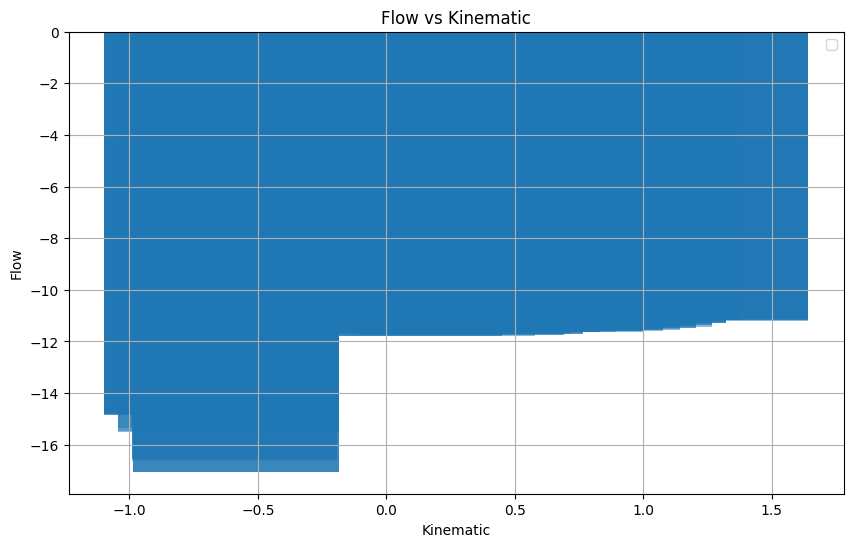

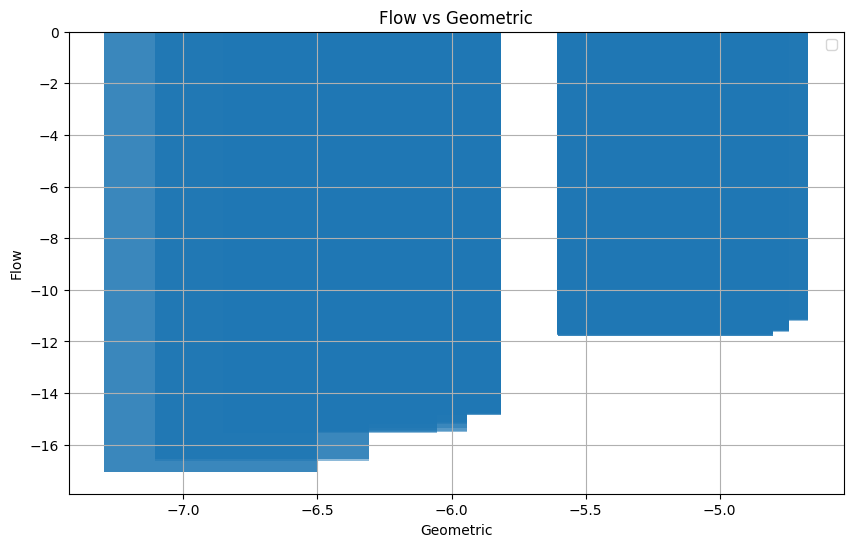

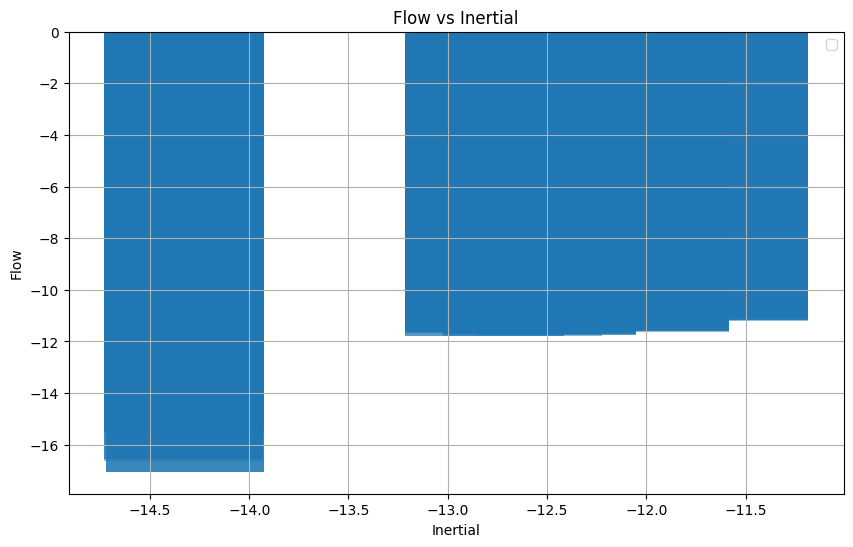

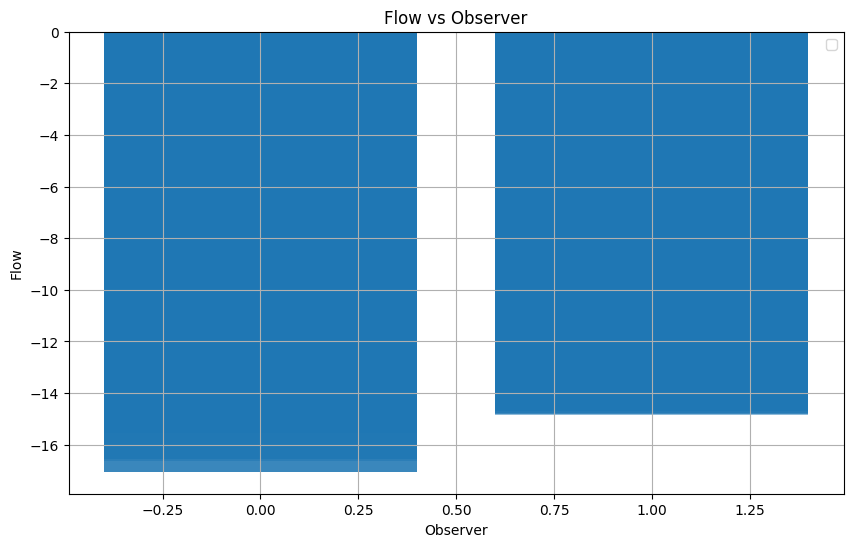

In [8]:
columns = ["Kinematic", "Geometric", "Inertial", "Observer"]

highest_flow = data["Flow"].max()
lowest_flow = data["Flow"].min()

for column in columns:

    
    plt.figure(figsize=(10, 6))
    plt.bar(data[column], data["Flow"], alpha=0.5)

    plt.title(f'Flow vs {column}')
    plt.xlabel(column)
    plt.ylabel('Flow')
    plt.legend()
    plt.grid(True)
    plt.show()

In [9]:
correlation = data[["Flow"] + columns].corr()
print("Korrelation mellan Flow och andra kolumner:")
print(correlation["Flow"])

Korrelation mellan Flow och andra kolumner:
Flow         1.000000
Kinematic    0.863403
Geometric    0.995794
Inertial     0.903310
Observer     0.181490
Name: Flow, dtype: float64


In [10]:
from linear_regression import LinearRegression

X = data.drop(columns=['Flow'])

y = data['Flow'] 

model = LinearRegression()
model.fit(X.values, y.values)  # Här använder jag  ".values" för att omvandla till numpy-arrayer så att datan fungarar med min LinearRegression-klass.

print("Intercept (B0):", model.intercept)
print("Koefficienter (B1, ...):", model.coefficients)
print("Features: ", model.number_of_features)
print("Sample size: ", model.sample_size)
print("Variance: ", model.variance(X, y))
print("Standard deviation: ", model.standard_deviation(X, y))
print("Regressionsrelevans: ", model.r_squared(X, y))

f_stat, p_value = model.significance(X, y)
print(f"F-statistik: {f_stat:.3f}")
print(f"P-värde för regressionen: {p_value:.5f}")

t_values, p_values = model.individual_significance(X, y)
print("T-värden:", [f"{t:.3f}" for t in t_values])
print("P-värden:", [f"{p:.3f}" for p in p_values])



Koefficienter (inklusive intercept): [1.49 0.75]
Intercept (B0): 1.4900000000000033
Koefficienter (B1, ...): [0.75]
Förutsagda värden: [5.99 6.74 7.49]
R² (hur bra modellen passar datan): 0.8114541257934219
Antal features (dimensioner): 1
Antal datapunkter (n): 5
Varians, dvs hur mycket de faktiska värdena skiljer sig ifrån de förutsagda värdena (σ²): 0.43566666666666637
F-statistik: (np.float64(12.91124713083398), np.float64(0.03693878373725663))
Standardavvikelse, vilket visar en mer noggrann skillnad mellan de förutsagda värdena och de faktiska värdena (σ): 0.6600505031182586
Feature 1: Korrelation = 0.901, p-värde = 0.037
Koefficienter (inklusive intercept): [-2.58376909  0.87000771  3.60315069 -0.75188958  0.0168805 ]
Intercept (B0): -2.5837690866916496
Koefficienter (B1, ...): [ 0.87000771  3.60315069 -0.75188958  0.0168805 ]
Features:  4
Sample size:  198
Variance:  0.006272292538356645
Standard deviation:  0.07919780639864116
Regressionsrelevans:  0.9971526073276518
F-statistik

In [11]:
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)


column_names = data.columns[1:] 

correlation_results = model.pearson_correlation(X, y)

for feature_name, (corr, p_val) in zip(column_names, correlation_results.values()):
    print(f"{feature_name}: Korrelation = {corr:.3f}, p-värde = {p_val:.3f}")



confidence_intervals = model.confidence_intervals(X, y)

for coef, (lower, upper) in confidence_intervals.items():
    print(f"{coef}: ({lower:.3f}, {upper:.3f})")





Kinematic: Korrelation = 0.863, p-värde = 0.000
Geometric: Korrelation = 0.996, p-värde = 0.000
Inertial: Korrelation = 0.903, p-värde = 0.000
Observer: Korrelation = 0.181, p-värde = 0.011
Beta 0: (-2.608, -2.560)
Beta 1: (0.809, 0.931)
Beta 2: (3.577, 3.629)
Beta 3: (-0.775, -0.729)
